# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In the Data, there are 17 campaigns. Quoted directly from the article: "The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate)."

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

from time import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.utils.fixes import loguniform


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


set_config(display="diagram")




In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Using describe, we can look at the data as a whole to understand it better. It makes more sense, and since we can see calculations such as the mean, range, and percentiles, we can begin to make an even more sense of the data

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The business objective of the task is if the client subscribes to the term deposit. This model should be helpful to identify what aspects that make a client a good target to call.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:

Num_Col = ['age']
Or_Cat_Col =  ['job','education'] #run Ordinal Encoder on
Cat_Col = ['marital', 'default', 'housing', 'loan'] # OneHotEncoder on


In [8]:
CT_pipe = ColumnTransformer([
    ("num", StandardScaler(), Num_Col), #scale the numeric column
    ('cat', OneHotEncoder(),Cat_Col), # OneHotEncoder for the caterogical columns
    ('cator', OrdinalEncoder(),Or_Cat_Col) # 
])

In [9]:
df['y'] = df['y'].replace(['No', 'Yes',], ['0', '1'])
df['y'] = df['y'].replace(['no', 'yes',], ['0', '1'])
df['y'] = pd.to_numeric(df['y'])

#making this usable numerically

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
df_clean = df.drop(['contact','month','day_of_week','duration','campaign','pdays','previous','poutcome',
                    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis = 1)


In [11]:
X = df_clean.drop('y', axis = 1)
y = df_clean['y']



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True) 



xl_train = CT_pipe.fit_transform(X_train)
xl_test = CT_pipe.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
y.value_counts()


print(36548/len(y))
#how much of the dataset would say no
print (1 - .887)
#how much of the dataset says yes

0.8873458288821987
0.11299999999999999


The baseline performance that our classifier shoudl aim to beat should be above 88% and cannot go under 11%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
logis_model = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l2', solver='saga', max_iter=8000, C=50)
logis_model.fit(xl_train, y_train)

LogisticRegression(C=50, max_iter=8000, solver='saga')

### Problem 9: Score the Model

What is the accuracy of your model?

In [15]:
logis_predict = logis_model.predict(xl_test)# check performance
logis_predict_ta = logis_model.predict(xl_train)# check performance
print('ROC AUC score:',roc_auc_score(y_test, logis_predict))
print('Train Accuracy score:', accuracy_score(y_train, logis_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, logis_predict))
print('F1 score:',f1_score(y_test, logis_predict))
print(classification_report(y_test, logis_predict, target_names=['No', 'Yes']))



print('The accuracy is at 88%, which is the same as our basline expected results. Therefore this Model was not an effective way to guess')

ROC AUC score: 0.5
Train Accuracy score: 0.887119225664433
Test Accuracy score: 0.8880256385354958
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9144
         Yes       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297

The accuracy is at 88%, which is the same as our basline expected results. Therefore this Model was not an effective way to guess


C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(xl_train, y_train)

knn_predict = knn_model.predict(xl_test)
knn_predict_ta = knn_model.predict(xl_train)
print('ROC AUC score:', roc_auc_score(y_test, knn_predict))
print('Train Accuracy score:', accuracy_score(y_train, knn_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, knn_predict))
print('F1 score:', f1_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict, target_names=['No', 'Yes']))

C:\Users\nowre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nowre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

ROC AUC score: 0.5197551330584977
Train Accuracy score: 0.8897089767246124
Test Accuracy score: 0.877342915412256
F1 score: 0.09721229449606864
              precision    recall  f1-score   support

          No       0.89      0.98      0.93      9144
         Yes       0.28      0.06      0.10      1153

    accuracy                           0.88     10297
   macro avg       0.58      0.52      0.52     10297
weighted avg       0.82      0.88      0.84     10297



In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(xl_train, y_train)

dtc_predict = dtc.predict(xl_test)
dtc_predict_ta = dtc.predict(xl_train)
print('ROC AUC score:',roc_auc_score(y_test, dtc_predict))
print('Train Accuracy score:', accuracy_score(y_train, dtc_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, dtc_predict))
print('F1 score:',f1_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict, target_names=['No', 'Yes']))

ROC AUC score: 0.524215519785959
Train Accuracy score: 0.9169661066329999
Test Accuracy score: 0.8617072933864233
F1 score: 0.1263803680981595
              precision    recall  f1-score   support

          No       0.89      0.96      0.92      9144
         Yes       0.22      0.09      0.13      1153

    accuracy                           0.86     10297
   macro avg       0.55      0.52      0.53     10297
weighted avg       0.82      0.86      0.84     10297



In [18]:
svc_model = SVC()
svc_model.fit(xl_train, y_train)

svc_predict = svc_model.predict(xl_test)# check performance
svc_predict_ta = svc_model.predict(xl_train)# check performance
print('RO CAUC score:',roc_auc_score(y_test, svc_predict))
print('Train Accuracy score:', accuracy_score(y_train, svc_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
print(classification_report(y_test, svc_predict, target_names=['No', 'Yes']))

RO CAUC score: 0.5
Train Accuracy score: 0.887119225664433
Test Accuracy score: 0.8880256385354958
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9144
         Yes       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297



C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nowre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
data = {'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree'],
        'Train Accuracy': [ 0.888, 0.893, 0.888, 0.918],
        'Test Accuracy': [0.886, 0.877, 0.886, 0.864],
        'Train Time': [14100, 3, 23600, 57.5]
       }
results_df = pd.DataFrame(data).set_index('Model')

print('RESULTS')
results_df.head()

RESULTS


,Train Accuracy,Test Accuracy,Train Time
Model,,,
Logistic Regression,0.888,0.886,14100.0
KNN,0.893,0.877,3.0
SVM,0.888,0.886,23600.0
Decision Tree,0.918,0.864,57.5


As we can see from the dataset abovve, the least accurate model is also the mose useful in predicting our business question, whether someone will open an term deposit. We can conclude that model accuracy is porbably not going to be an accurate way to measure our business question. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

If we take a look at the catagory info above, we can see that there are no gender information provided, therefore it is not really somethign we can keep. As far as hyperparameter search goes, we can begin by looking at overall relationships of all the catagories, through a heatmap

<AxesSubplot:>

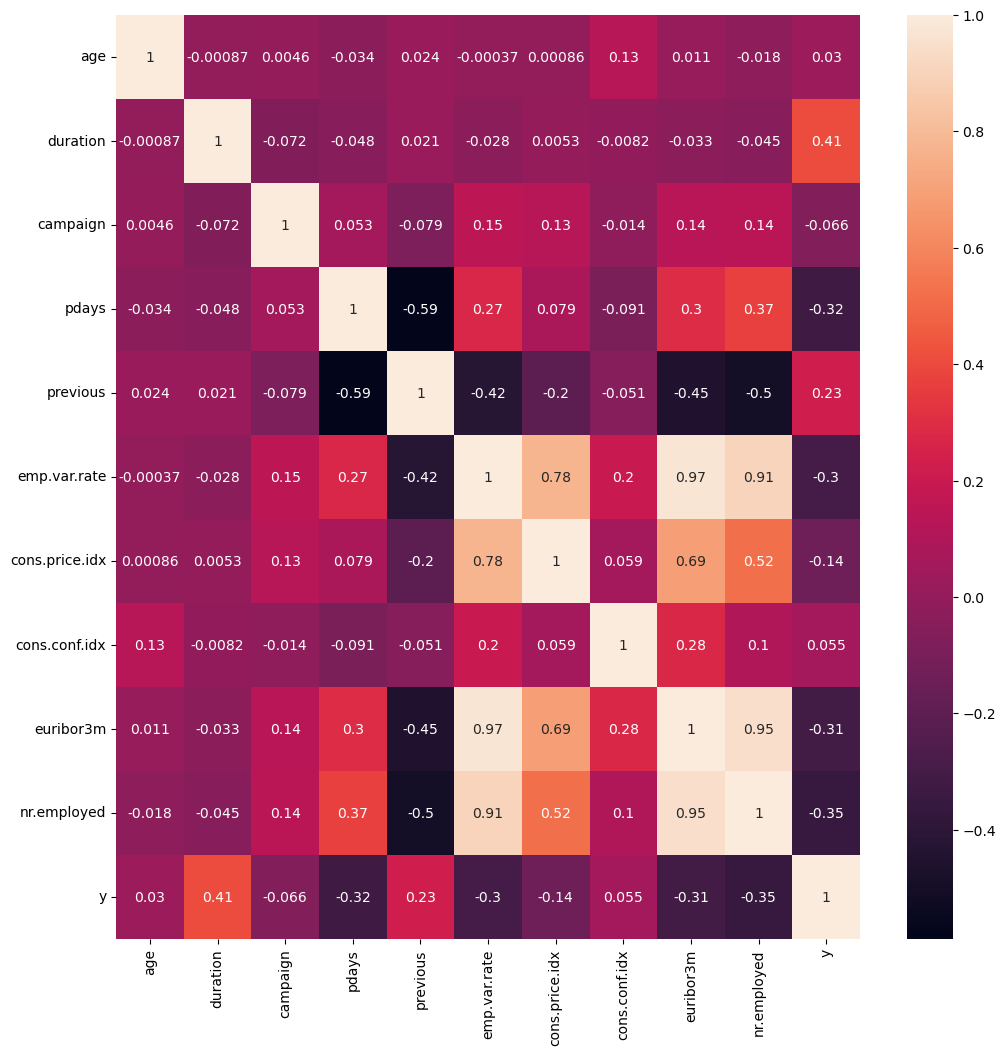

In [21]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True) 

If we take a look at this heatmap, we can see that the correlations in many of the catagories are fairly weak. Continuing on to hyperparameters of our models:

In [22]:
#NEW
Num_Col2 = ['age', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
Or_Cat_Col2 =  ['job','education']
Cat_Col2 = ['marital', 'default', 'housing', 'loan', 'poutcome']


CT_pipe2 = ColumnTransformer([
    ("num", StandardScaler(), Num_Col2), 
    ('cat', OneHotEncoder(), Cat_Col2),
    ('cator', OrdinalEncoder(),Or_Cat_Col2)  
])

df_clean2 = df.drop(['duration'], axis = 1 )

In [23]:
X2 = df_clean2.drop('y', axis = 1)
y2 = df_clean2['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, shuffle=True) 
xl_train2 = CT_pipe2.fit_transform(X_train2)
xl_test2 = CT_pipe2.transform(X_test2)

In [24]:
xc = []
xc.append(np.array( ['age', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']))
xc.append((CT_pipe2.transformers_[1][1].get_feature_names()))
xc.append((CT_pipe2.transformers_[2][1].categories_[0]))
xc.append((CT_pipe2.transformers_[2][1].categories_[1]))

xc = np.concatenate(xc)

C:\Users\nowre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(xl_train2, y_train2)
svc_time = time() - t0
print("done in %0.3fs" % (svc_time))
print("Best estimator found by grid search:")
print(clf.best_estimator_)





In [ ]:
svc_predict3 = clf.predict(xl_test2)
svc_predict3_ta = clf.predict(xl_train2)


print('ROC AUC score:',roc_auc_score(y_test2, svc_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, svc_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, svc_predict3))
print('F1 score:',f1_score(y_test2, svc_predict3))
print(classification_report(y_test2, svc_predict3, target_names=['No', 'Yes']))

After we made some changes to the original data set, the hyperparameter adn adjustment, we see some improvement to the SVM Model. Because the data was not balanced initially, retuning it has imporoved this model, and thus can also suggests the others can be imporved. 

Overall: The best model now, still leaves alot of room for imporvement, only 64% of the clients would say yes according this this. Barely more than half, while good, it still not a good model of confirming is a client will indeed subcribe their term deposits. 

##### Questions